# Data Analysis: Best Countries to Live in 2024 Dataset
## By Khoo Ed Win

This notebook is used for practice and learning purposes. The dataset used in this notebook is publically available via Kaggle at the following
URL: [https://www.kaggle.com/datasets/rafsunahmad/best-country-to-live-in-2024/code] by Rafsun Ahmad.


# Table of Contents
1. Loading Important Libraries
2. Loading the dataset
3. Learning the dataset
    - Dataset Summary
    - Statistical Summary
4. Data Cleaning
    - Handling Duplicate Entires
    - Handling Missing Values
    - Handling Outliers
    - Converting Data Types
5. Exploratory Data Analysis
6. Data Preprocessing
    - Feature Engineering
    - Feature Scaling
    - Data Encoding
7. Model Building
    - Splitting Data into Training and Testing Sets
    - Selecting a Model
    - Training the Model
    - Evaluating the Model
    - Hyperparameter Tuning
    - Re-evaluation
8. Interpretation and Conclusions
9. Miscellaneous

---

## 1. Loading important libraries

Several libraries are imported to aid in the data cleaning, data preprocessing and visualisation process

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

c:\Users\User\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


---

## 2. Loading the dataset
We can load the dataset to be analysed using pandas `read_csv()` function and have a preview of the first five items

In [3]:
df = pd.read_csv('best-countries-to-live-in-2024.csv')
df.head(10)

,population_2024,population_growthRate,land_area,country,region,unMember,population_density,population_densityMi,share_borders,Hdi2021,Hdi2020,WorldHappiness2022
0,1441719852,0.00916,3287590,India,Asia,True,484.9067,1255.9084,"AFG, BGD, BTN, MMR, CHN, NPL, PAK, LKA",0.633,0.642,3.777
1,1425178782,-0.00035,9706961,China,Asia,True,151.2174,391.6530,"AFG, BTN, MMR, HKG, IND, KAZ, PRK, KGZ, LAO, M...",0.768,0.764,5.585
2,341814420,0.00535,9372610,United States,North America,True,37.3673,96.7813,"CAN, MEX",0.921,0.920,6.977
3,279798049,0.00816,1904569,Indonesia,Asia,True,149.0254,385.9758,"TLS, MYS, PNG",0.705,0.709,5.240
4,245209815,0.01964,881912,Pakistan,Asia,True,318.0908,823.8551,"AFG, CHN, IND, IRN",0.544,0.543,4.516
5,229152217,0.02389,923768,Nigeria,Africa,True,251.6027,651.6511,"BEN, CMR, TCD, NER",0.535,0.535,4.552
6,217637297,0.00561,8515767,Brazil,South America,True,26.0390,67.4409,"ARG, BOL, COL, GUF, GUY, PRY, PER, SUR, URY, VEN",0.754,0.758,6.293
7,174701211,0.01010,147570,Bangladesh,Asia,True,1342.1004,3476.0401,"MMR, IND",0.661,0.655,5.155
8,143957079,-0.00337,17098242,Russia,Europe,True,8.7903,22.7668,"AZE, BLR, CHN, EST, FIN, GEO, KAZ, PRK, LVA, L...",0.829,0.830,5.459
9,129719719,0.02523,1104300,Ethiopia,Africa,True,114.9415,297.6986,"DJI, ERI, KEN, SOM, SSD, SDN",0.498,0.498,4.241


---

## 3. Learning the dataset
We can explore the dataset to learn and understand more information about the dataset.

### 3a. Dataset summary

In [4]:
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141 entries, 0 to 140
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   population_2024        141 non-null    int64  
 1   population_growthRate  141 non-null    float64
 2   land_area              141 non-null    int64  
 3   country                141 non-null    object 
 4   region                 141 non-null    object 
 5   unMember               141 non-null    bool   
 6   population_density     141 non-null    float64
 7   population_densityMi   141 non-null    float64
 8   share_borders          129 non-null    object 
 9   Hdi2021                141 non-null    float64
 10  Hdi2020                141 non-null    float64
 11  WorldHappiness2022     141 non-null    float64
dtypes: bool(1), float64(6), int64(2), object(3)
memory usage: 12.4+ KB


None

---

### 3b. Statistical summary of all the features.

In [5]:
df.describe()

,population_2024,population_growthRate,land_area,population_density,population_densityMi,Hdi2021,Hdi2020,WorldHappiness2022
count,1.410000e+02,141.000000,1.410000e+02,141.000000,141.000000,141.000000,141.000000,141.000000
mean,5.422157e+07,0.009327,8.734306e+05,272.742080,706.401985,0.737199,0.737596,5.542582
std,1.749363e+08,0.012112,2.200180e+06,945.620017,2449.155844,0.153844,0.152319,1.105247
min,3.776890e+05,-0.030870,3.160000e+02,2.243100,5.809600,0.394000,0.397000,2.404000
25%,5.494963e+06,0.001180,6.455900e+04,37.367300,96.781300,0.607000,0.610000,4.744000
50%,1.171577e+07,0.008920,2.383910e+05,87.135400,225.680700,0.754000,0.756000,5.578000
75%,3.910705e+07,0.018230,6.522300e+05,170.267800,440.993500,0.875000,0.871000,6.293000
max,1.441720e+09,0.038090,1.709824e+07,8429.956800,21833.588200,0.962000,0.959000,7.821000


---

## 4. Data Cleaning
In this section, we will be identifying issues that must be solved in order to have a clean dataset.
1. Duplicate entries
2. Missing values
3. Outliers
4. Suitable data types

Several techniques will be used to handle these issues with the dataset.
### 4.1 Handling duplicate entries

In [6]:
duplicates = df[df.duplicated()]
duplicates.head(10)

,population_2024,population_growthRate,land_area,country,region,unMember,population_density,population_densityMi,share_borders,Hdi2021,Hdi2020,WorldHappiness2022


In [7]:
duplicates.shape

(0, 12)

Since there are no duplicate entries, we will move on to handling missing values.

---

### 4.2 Handling missing values

In [8]:
df.isnull().sum()

population_2024           0
population_growthRate     0
land_area                 0
country                   0
region                    0
unMember                  0
population_density        0
population_densityMi      0
share_borders            12
Hdi2021                   0
Hdi2020                   0
WorldHappiness2022        0
dtype: int64

There are missing values in the `share_borders` column. Let us take look at the entries with missing data to gain insight on why that might be the case.

In [9]:
df[df['share_borders'].isnull()]

,population_2024,population_growthRate,land_area,country,region,unMember,population_density,population_densityMi,share_borders,Hdi2021,Hdi2020,WorldHappiness2022
11,122631432,-0.00538,377930,Japan,Asia,True,336.4374,871.3729,NaN,0.925,0.923,6.039
12,119106224,0.01508,342353,Philippines,Asia,True,399.4574,1034.5948,NaN,0.699,0.710,5.904
46,31056610,0.02410,587041,Madagascar,Africa,True,53.3802,138.2548,NaN,0.501,0.501,4.339
50,26699482,0.00985,7692024,Australia,Oceania,True,3.4711,8.9901,NaN,0.951,0.947,7.162
99,6052709,0.00632,710,Singapore,Asia,True,8429.9568,21833.5882,NaN,0.939,0.939,6.480
106,5269939,0.00800,270467,New Zealand,Oceania,True,20.0142,51.8368,NaN,0.937,0.936,7.200
121,2824738,-0.00029,10991,Jamaica,North America,True,260.8253,675.5375,NaN,0.709,0.713,5.850
131,1498712,0.00889,765,Bahrain,Asia,True,1909.1873,4944.7950,NaN,0.875,0.877,6.647
133,1301978,0.00109,2040,Mauritius,Africa,True,641.3685,1661.1443,NaN,0.802,0.804,6.071
136,867605,0.01823,1862,Comoros,Africa,True,466.2037,1207.4675,NaN,0.558,0.562,4.609


By referring to the `country` column of these data. These countries do not have direct land borders with other countries or are islands. They do however have maritime borders (boundaries between countries in bodies of water). Hence, we can impute these missing values to have NONE using dummy coding to explicitly denote the absence of shared borders.

In [10]:
df['share_borders'] = df['share_borders'].fillna('NONE')

Let's check the dataset again

In [11]:
df.isnull().sum()

population_2024          0
population_growthRate    0
land_area                0
country                  0
region                   0
unMember                 0
population_density       0
population_densityMi     0
share_borders            0
Hdi2021                  0
Hdi2020                  0
WorldHappiness2022       0
dtype: int64

Now we have no missing values in our dataset. We can proceed to checking for outliers

---

### 4.3 Handling outliers
Two techniques are used here to check for outliers that can signiciantly impact the results.

1. Boxplots

Boxplots provide a concise visual representation of the spread of the data, showing the median, quartiles, and potential outliers.
The whiskers in a boxplot extend to the most extreme data points within a specified range (commonly 1.5 times the IQR). Any data points beyond the whiskers are often considered potential outliers and are plotted individually. (This can be seen when analysing the population_2024 column)

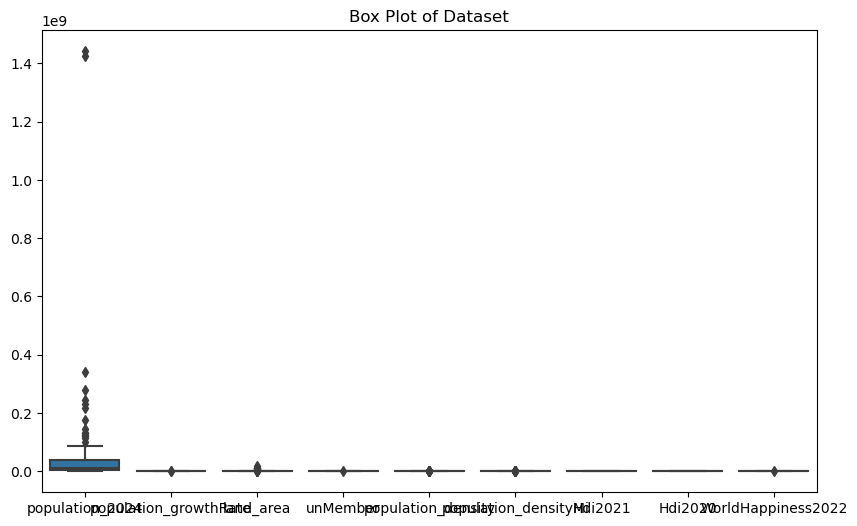

In [12]:
# Checking for outliers using box plots
plt.figure(figsize=(10, 6))
sns.boxplot(data=df)
plt.title("Box Plot of Dataset")
plt.show()

2. Histogram

Histograms provide a visual representation of the distribution of data, illustrating the frequency of values within specified bins. Outliers may manifest as isolated bars at the extreme ends of the histogram, particularly in the tails. Skewed distributions or long tails can sometimes indicate the presence of outliers.

<Figure size 1000x600 with 0 Axes>

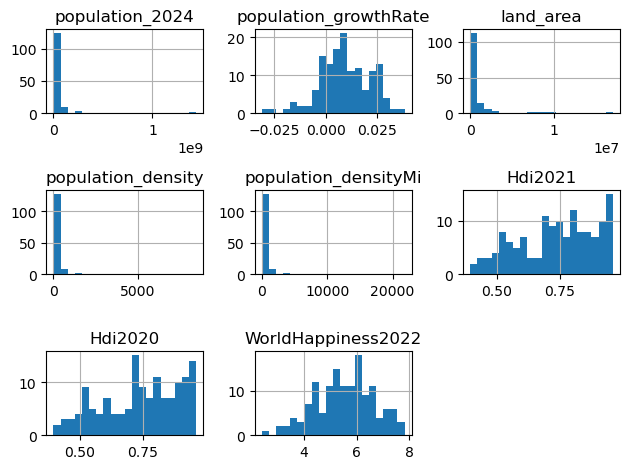

In [13]:
# Checking for outliers using histograms
plt.figure(figsize=(10, 6))
df.hist(bins=20)
plt.tight_layout()
plt.show()

From the diagrams gathered using the boxplot and histograms there are some outliers. We can confirm if these outliers may affect the results by checking the correlation. But first we may need to convert the data types to properly assess the dataset.

---

### 4.4 Converting data types

In [14]:
df.dtypes

population_2024            int64
population_growthRate    float64
land_area                  int64
country                   object
region                    object
unMember                    bool
population_density       float64
population_densityMi     float64
share_borders             object
Hdi2021                  float64
Hdi2020                  float64
WorldHappiness2022       float64
dtype: object

`country`, `region`, and `share_borders` are are object data types in the dataset. Thus, we shall convert them to their appropriate data types.

In [15]:
df['country'].unique()

array(['India', 'China', 'United States', 'Indonesia', 'Pakistan',
       'Nigeria', 'Brazil', 'Bangladesh', 'Russia', 'Ethiopia', 'Mexico',
       'Japan', 'Philippines', 'Egypt', 'Vietnam', 'Turkey', 'Germany',
       'Thailand', 'Tanzania', 'United Kingdom', 'France', 'South Africa',
       'Italy', 'Kenya', 'Myanmar', 'Colombia', 'South Korea', 'Uganda',
       'Sudan', 'Spain', 'Iraq', 'Algeria', 'Argentina', 'Afghanistan',
       'Poland', 'Canada', 'Morocco', 'Ukraine', 'Saudi Arabia',
       'Uzbekistan', 'Yemen', 'Mozambique', 'Ghana', 'Peru', 'Malaysia',
       'Nepal', 'Madagascar', 'Ivory Coast', 'Cameroon', 'Niger',
       'Australia', 'Mali', 'Burkina Faso', 'Sri Lanka', 'Malawi',
       'Zambia', 'Kazakhstan', 'Chile', 'Romania', 'Chad', 'Ecuador',
       'Guatemala', 'Senegal', 'Netherlands', 'Cambodia', 'Zimbabwe',
       'Rwanda', 'Benin', 'Bolivia', 'Tunisia', 'Belgium',
       'Dominican Republic', 'Jordan', 'Honduras', 'Sweden',
       'Czech Republic', 'Azerbaijan

In [16]:
df.set_index('country', inplace=True)

In [17]:
df['region'].unique()

array(['Asia', 'North America', 'Africa', 'South America', 'Europe',
       'Oceania'], dtype=object)

In [18]:
df['region'] = df['region'].astype('category')

In [19]:
df['share_borders'].unique()

array(['AFG, BGD, BTN, MMR, CHN, NPL, PAK, LKA',
       'AFG, BTN, MMR, HKG, IND, KAZ, PRK, KGZ, LAO, MAC, MNG, PAK, RUS, TJK, VNM',
       'CAN, MEX', 'TLS, MYS, PNG', 'AFG, CHN, IND, IRN',
       'BEN, CMR, TCD, NER',
       'ARG, BOL, COL, GUF, GUY, PRY, PER, SUR, URY, VEN', 'MMR, IND',
       'AZE, BLR, CHN, EST, FIN, GEO, KAZ, PRK, LVA, LTU, MNG, NOR, POL, UKR',
       'DJI, ERI, KEN, SOM, SSD, SDN', 'BLZ, GTM, USA', 'NONE',
       'ISR, LBY, SDN', 'KHM, CHN, LAO',
       'ARM, AZE, BGR, GEO, GRC, IRN, IRQ, SYR',
       'AUT, BEL, CZE, DNK, FRA, LUX, NLD, POL, CHE',
       'MMR, KHM, LAO, MYS', 'BDI, COD, KEN, MWI, MOZ, RWA, UGA, ZMB',
       'IRL', 'AND, BEL, DEU, ITA, LUX, MCO, ESP, CHE',
       'BWA, LSO, MOZ, NAM, SWZ, ZWE', 'AUT, FRA, SMR, SVN, CHE, VAT',
       'ETH, SOM, SSD, TZA, UGA', 'BGD, CHN, IND, LAO, THA',
       'BRA, ECU, PAN, PER, VEN', 'PRK', 'COD, KEN, RWA, SSD, TZA',
       'CAF, TCD, EGY, ERI, ETH, LBY, SSD', 'AND, FRA, GIB, PRT, MAR',
       'IRN, JOR, KWT, S

In [20]:
df['share_borders'] = df['share_borders'].astype('category')

In [21]:
df.dtypes

population_2024             int64
population_growthRate     float64
land_area                   int64
region                   category
unMember                     bool
population_density        float64
population_densityMi      float64
share_borders            category
Hdi2021                   float64
Hdi2020                   float64
WorldHappiness2022        float64
dtype: object

In [22]:
df.head(10)

,population_2024,population_growthRate,land_area,region,unMember,population_density,population_densityMi,share_borders,Hdi2021,Hdi2020,WorldHappiness2022
country,,,,,,,,,,,
India,1441719852,0.00916,3287590,Asia,True,484.9067,1255.9084,"AFG, BGD, BTN, MMR, CHN, NPL, PAK, LKA",0.633,0.642,3.777
China,1425178782,-0.00035,9706961,Asia,True,151.2174,391.6530,"AFG, BTN, MMR, HKG, IND, KAZ, PRK, KGZ, LAO, M...",0.768,0.764,5.585
United States,341814420,0.00535,9372610,North America,True,37.3673,96.7813,"CAN, MEX",0.921,0.920,6.977
Indonesia,279798049,0.00816,1904569,Asia,True,149.0254,385.9758,"TLS, MYS, PNG",0.705,0.709,5.240
Pakistan,245209815,0.01964,881912,Asia,True,318.0908,823.8551,"AFG, CHN, IND, IRN",0.544,0.543,4.516
Nigeria,229152217,0.02389,923768,Africa,True,251.6027,651.6511,"BEN, CMR, TCD, NER",0.535,0.535,4.552
Brazil,217637297,0.00561,8515767,South America,True,26.0390,67.4409,"ARG, BOL, COL, GUF, GUY, PRY, PER, SUR, URY, VEN",0.754,0.758,6.293
Bangladesh,174701211,0.01010,147570,Asia,True,1342.1004,3476.0401,"MMR, IND",0.661,0.655,5.155
Russia,143957079,-0.00337,17098242,Europe,True,8.7903,22.7668,"AZE, BLR, CHN, EST, FIN, GEO, KAZ, PRK, LVA, L...",0.829,0.830,5.459


---

## 5. Exploratory Data Analysis

In this section, we will explore the summary statistics previously shown and show some descriptive graphs to gain basic insights about the dataset.\

### 5.1 Checking the best countries based on world happiness (Top 10 and Bottom 10 countries)

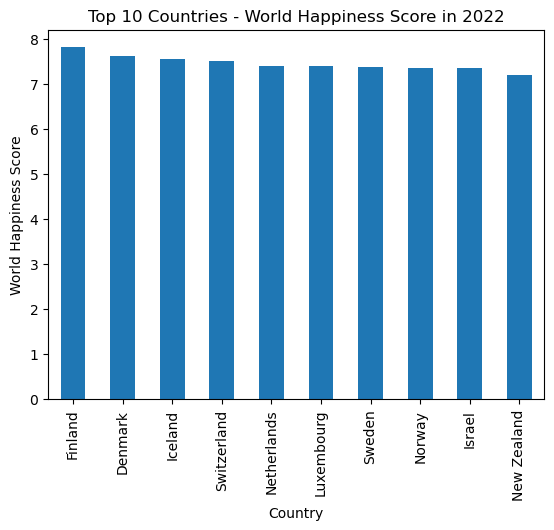

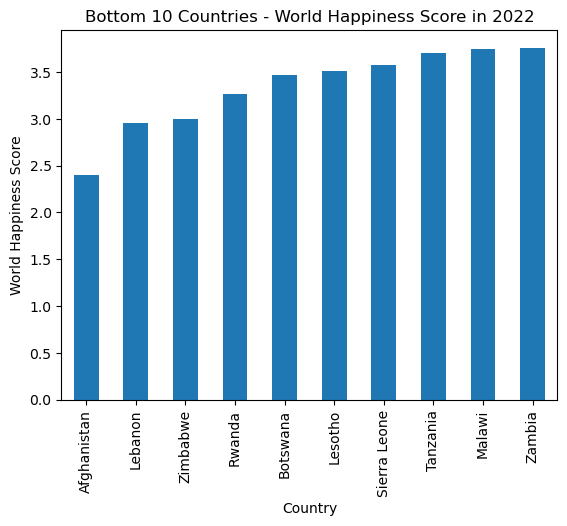

In [23]:
top_10 = df['WorldHappiness2022'].nlargest(10)
bottom_10 = df['WorldHappiness2022'].nsmallest(10)

top_10.plot(kind='bar')
plt.xlabel('Country')
plt.ylabel('World Happiness Score')
plt.title('Top 10 Countries - World Happiness Score in 2022')
plt.show()

bottom_10.plot(kind='bar')
plt.xlabel('Country')
plt.ylabel('World Happiness Score')
plt.title('Bottom 10 Countries - World Happiness Score in 2022')
plt.show()

---

### 5.2 Checking the fastest and slowest growing countries in terms of population

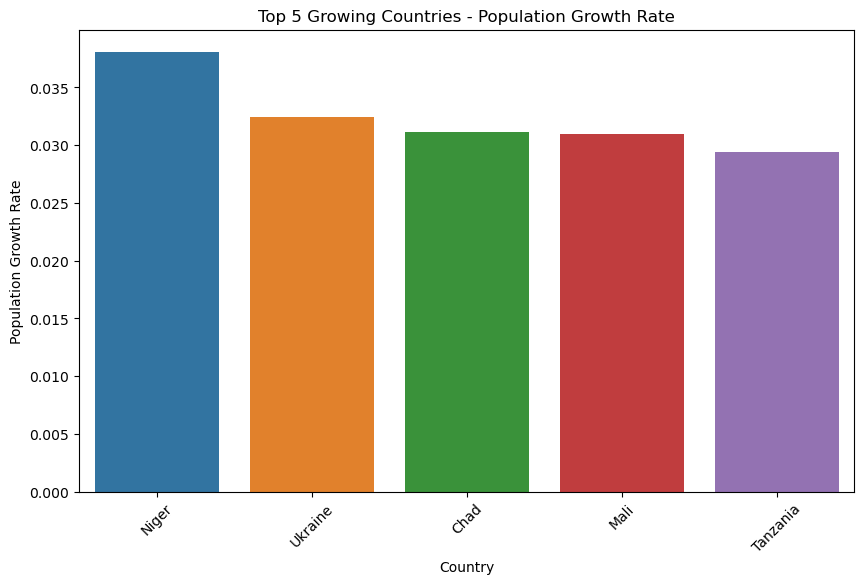

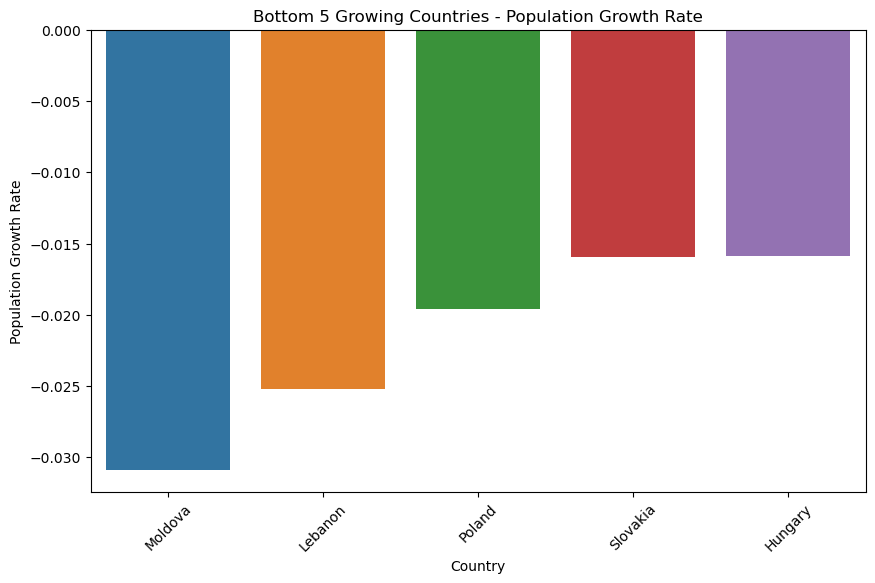

In [24]:
top_5_growth = df['population_growthRate'].nlargest(5)
bottom_5_growth = df['population_growthRate'].nsmallest(5)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_5_growth.index, y=top_5_growth.values)
plt.xlabel('Country')
plt.ylabel('Population Growth Rate')
plt.title('Top 5 Growing Countries - Population Growth Rate')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(x=bottom_5_growth.index, y=bottom_5_growth.values)
plt.xlabel('Country')
plt.ylabel('Population Growth Rate')
plt.title('Bottom 5 Growing Countries - Population Growth Rate')
plt.xticks(rotation=45)
plt.show()


---

### 5.3 Learning the relationship between World Happiness Score and Human Development Index (HDI)

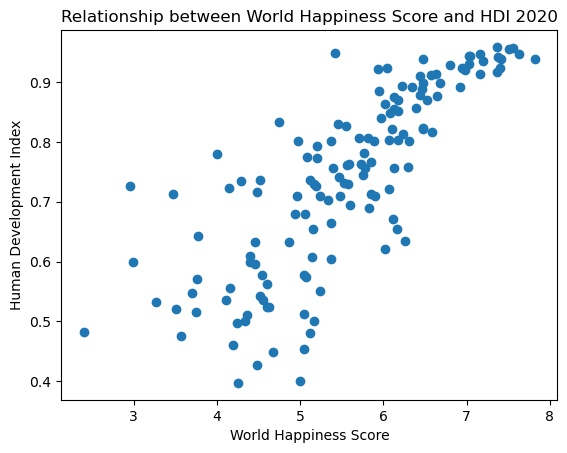

In [25]:
plt.scatter(df['WorldHappiness2022'], df['Hdi2020'])
plt.xlabel('World Happiness Score')
plt.ylabel('Human Development Index')
plt.title('Relationship between World Happiness Score and HDI 2020')
plt.show()

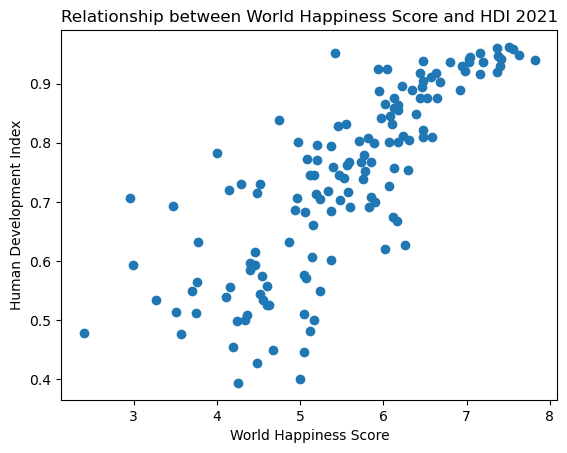

In [26]:
plt.scatter(df['WorldHappiness2022'], df['Hdi2021'])
plt.xlabel('World Happiness Score')
plt.ylabel('Human Development Index')
plt.title('Relationship between World Happiness Score and HDI 2021')
plt.show()

---

### 5.4 Population by Region/Continent

C:\Users\User\AppData\Local\Temp\ipykernel_41508\1133298499.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  region_population = df.groupby('region')['population_2024'].sum()


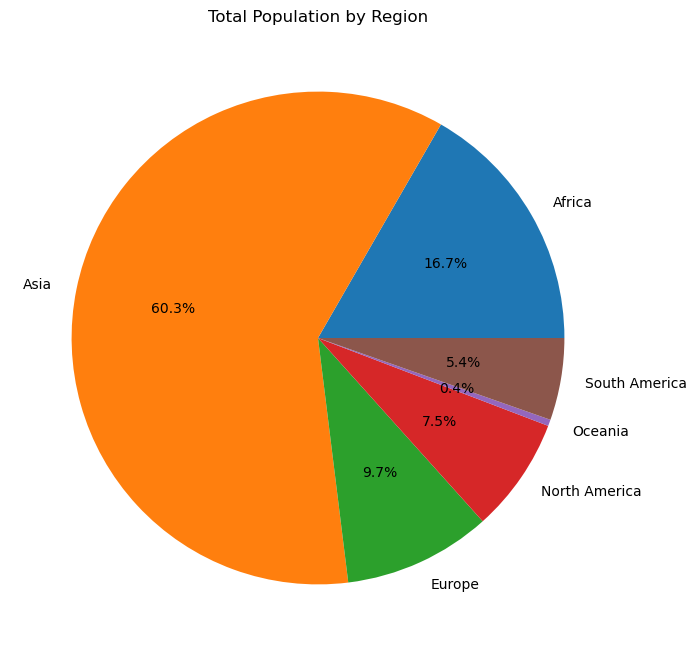

In [27]:
region_population = df.groupby('region')['population_2024'].sum()
region_population.plot.pie(autopct='%1.1f%%', figsize=(8, 8))
plt.title('Total Population by Region')
plt.ylabel('')
plt.show()

---

### 5.5 Average world happiness score by region

c:\Users\User\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


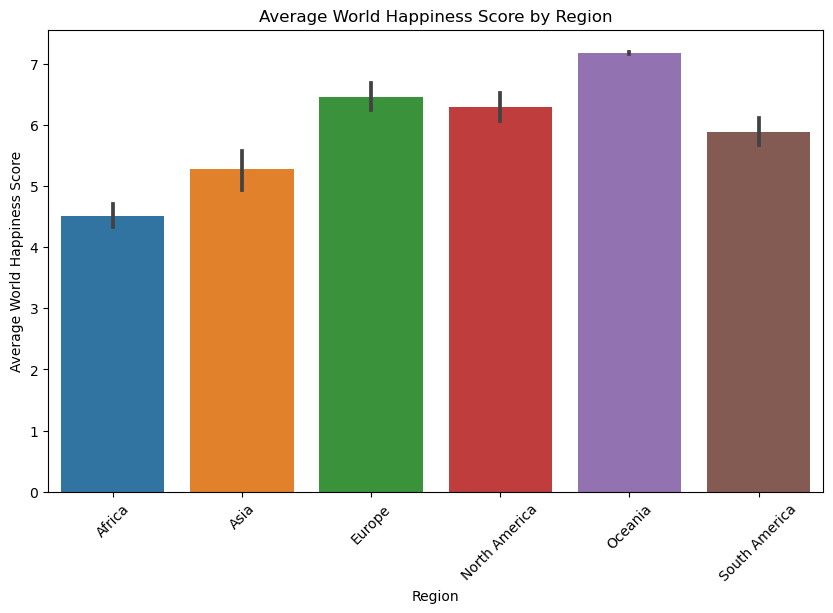

In [28]:
plt.figure(figsize=(10, 6))
sns.barplot(x='region', y='WorldHappiness2022', data=df)
plt.xlabel('Region')
plt.ylabel('Average World Happiness Score')
plt.title('Average World Happiness Score by Region')
plt.xticks(rotation=45)
plt.show()


---

### 5.6 Correlation analysis between population density, growth rate, land area and population size

<Axes: >

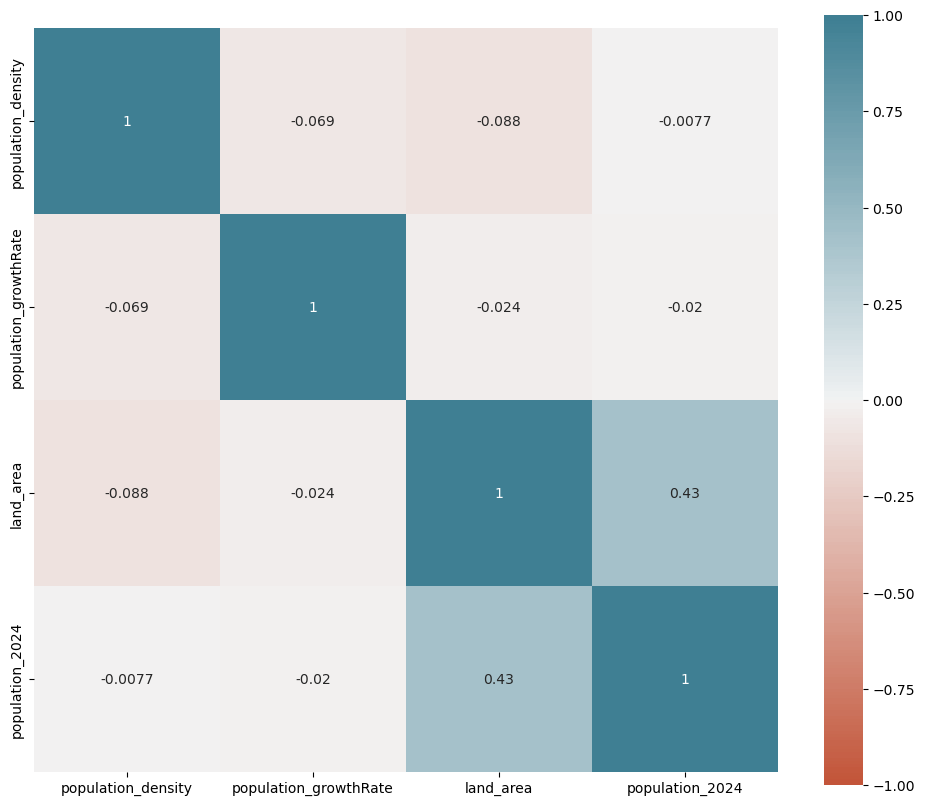

In [29]:
correlation_matrix = df[['population_density', 'population_growthRate', 'land_area', 'population_2024']].corr()
#Set the plotting size
plt.figure(figsize = (12,10))

#Generate the heatmap
sns.heatmap(
    correlation_matrix,
    vmin = -1, vmax = 1, center = 0,
    cmap = sns.diverging_palette(20, 220, n=200),
    square = True,
    annot = True
)

---

### 5.7 Land Area vs Population Density

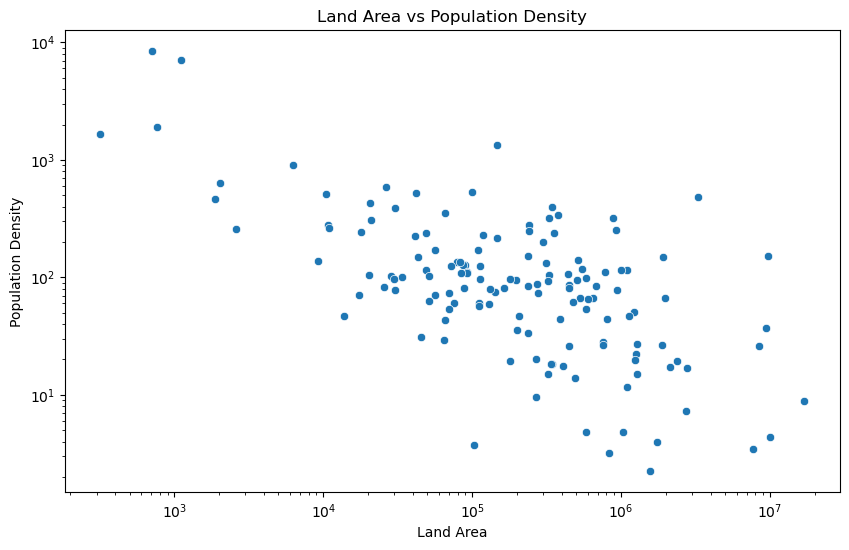

In [30]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='land_area', y='population_density', data=df)
plt.xlabel('Land Area')
plt.ylabel('Population Density')
plt.title('Land Area vs Population Density')
plt.xscale('log')
plt.yscale('log')
plt.show()

---

## 6. Data Preprocessing
For this section, we will be preparing the data for modelling. This involves transforming the data to make it suitable for machine learning models.
1. Feature Engineering
2. Feature Scaling
3. Data Encoding

---

### 6.1 Feature Engineering

We can create new features by combining or transforming existing features.
`HdiChange` represents the relative change in HDI between 2020 and 2021

In [31]:
df['HdiChange'] = ((df['Hdi2021'] - df['Hdi2020']) / df['Hdi2020']) * 100

`HdiTrend` is a binary indicator to represent whether the HDI increased, decreased or remained the same between 2020 and 2021

In [32]:
df['HdiTrend'] = np.where(df['Hdi2021'] > df['Hdi2020'], 'Increased',
                           np.where(df['Hdi2021'] < df['Hdi2020'], 'Decreased', 'Stable'))

---

### 6.2 Feature Scaling
Numerical features should be scaled to a similar range to avoid bias in the model

In [33]:
from sklearn.preprocessing import StandardScaler

# Select the numerical features to scale
numerical_features = ['population_density', 'population_growthRate', 'land_area', 'population_2024']

# Create a StandardScaler object
scaler = StandardScaler()

# Scale the numerical features
df[numerical_features] = scaler.fit_transform(df[numerical_features])

df.head(10)

,population_2024,population_growthRate,land_area,region,unMember,population_density,population_densityMi,share_borders,Hdi2021,Hdi2020,WorldHappiness2022,HdiChange,HdiTrend
country,,,,,,,,,,,,,
India,7.959723,-0.013804,1.101167,Asia,True,0.225165,1255.9084,"AFG, BGD, BTN, MMR, CHN, NPL, PAK, LKA",0.633,0.642,3.777,-1.401869,Decreased
China,7.864831,-0.801783,4.029226,Asia,True,-0.128971,391.6530,"AFG, BTN, MMR, HKG, IND, KAZ, PRK, KGZ, LAO, M...",0.768,0.764,5.585,0.523560,Increased
United States,1.649847,-0.329493,3.876719,North America,True,-0.249798,96.7813,"CAN, MEX",0.921,0.920,6.977,0.108696,Increased
Indonesia,1.294075,-0.096662,0.470332,Asia,True,-0.131298,385.9758,"TLS, MYS, PNG",0.705,0.709,5.240,-0.564175,Decreased
Pakistan,1.095651,0.854548,0.003869,Asia,True,0.048128,823.8551,"AFG, CHN, IND, IRN",0.544,0.543,4.516,0.184162,Increased
Nigeria,1.003532,1.206694,0.022960,Africa,True,-0.022435,651.6511,"BEN, CMR, TCD, NER",0.535,0.535,4.552,0.000000,Stable
Brazil,0.937474,-0.307949,3.485888,South America,True,-0.261820,67.4409,"ARG, BOL, COL, GUF, GUY, PRY, PER, SUR, URY, VEN",0.754,0.758,6.293,-0.527704,Decreased
Bangladesh,0.691161,0.064083,-0.331086,Asia,True,1.134886,3476.0401,"MMR, IND",0.661,0.655,5.155,0.916031,Increased
Russia,0.514790,-1.052014,7.400601,Europe,True,-0.280126,22.7668,"AZE, BLR, CHN, EST, FIN, GEO, KAZ, PRK, LVA, L...",0.829,0.830,5.459,-0.120482,Decreased


---

### 6.3 Data Encoding

In [34]:
from sklearn.preprocessing import OneHotEncoder
# One-Hot Encoding
df_encoded = pd.get_dummies(df)

---

### 6.4 Feature Selection

In [35]:
from sklearn.decomposition import PCA
pca = PCA(n_components=10)

# Fit and transform the data
df_pca = pca.fit_transform(df_encoded)

# df_pca now holds the data transformed to the first 10 principal components
df_pca.dtype

dtype('float64')

---

## 7. Model Building

### 7.1 Splitting Data
Prepare the dataset for modelling by splitting it to a test set and a train set.

In [36]:
from sklearn.model_selection import train_test_split

X = df_pca
y = df['WorldHappiness2022'] 

# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

---

### 7.2 Selecting a Model
Using Mean Squared Error (MSE) as the metric to evaluate the models for regression tasks. It is a measure of the quality of the estimater.
Since we are predicting a continuous value in WorldHappiness2022, four regression models are tested for its MSE

In [37]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor

# Define the models
models = [
    ('Linear Regression', LinearRegression()),
    ('Support Vector', SVR()),
    ('Random Forest', RandomForestRegressor()),
    ('K-Nearest Neighbour', KNeighborsRegressor())
]

---

### 7.3 Training the Model

In [38]:
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

# Create an empty DataFrame to store the results
results = pd.DataFrame(columns=['Model', 'MSE', 'Cross-Validation Score', 'R-squared Score'])

# Iterate over the models
for name, model in models:
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions
    predictions = model.predict(X_test)
    
    # Compute Mean Squared Error (MSE)
    mse = mean_squared_error(y_test, predictions)
    
    # Compute cross-validation score
    cv_score = cross_val_score(model, X_train, y_train, cv=5).mean()
    
    # Compute R-squared score
    r2_score = model.score(X_test, y_test)
    
    # Append the results to the DataFrame
    results = pd.concat([results, pd.DataFrame([{'Model': name, 'MSE': mse, 'Cross-Validation Score': cv_score, 'R-squared Score': r2_score}])], ignore_index=True)

# Display the results
results

C:\Users\User\AppData\Local\Temp\ipykernel_41508\1627700523.py:26: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results = pd.concat([results, pd.DataFrame([{'Model': name, 'MSE': mse, 'Cross-Validation Score': cv_score, 'R-squared Score': r2_score}])], ignore_index=True)


,Model,MSE,Cross-Validation Score,R-squared Score
0,Linear Regression,0.003023,0.996526,0.996932
1,Support Vector,1.187656,-0.204841,-0.205358
2,Random Forest,0.101470,0.916920,0.897017
3,K-Nearest Neighbour,1.725262,-0.401874,-0.750977


---

### 7.4 Evaluating the Model
Based on the provided results, here's an evaluation of the four models:

1. **Linear Regression**: This model has the lowest Mean Squared Error (MSE), the highest cross-validation score, and the highest R-squared score. This indicates that it has the best performance among the four models. It's making the most accurate predictions with the least error, and it's explaining a high proportion of the variance in the target variable.

2. **Support Vector**: This model has a high MSE, a negative cross-validation score, and a negative R-squared score. This indicates that it's performing poorly. It's making inaccurate predictions with a high error, and it's not explaining the variance in the target variable well.

3. **Random Forest**: This model has a relatively low MSE, a high cross-validation score, and a high R-squared score. This indicates that it's performing well, but not as well as the Linear Regression model. It's making fairly accurate predictions with a relatively low error, and it's explaining a good proportion of the variance in the target variable.

4. **K-Nearest Neighbour**: This model has the highest MSE, a negative cross-validation score, and a negative R-squared score. This indicates that it's performing the worst among the four models. It's making the least accurate predictions with the highest error, and it's not explaining the variance in the target variable well.

In summary, based on these results, the Linear Regression model is the best model for this data, followed by the Random Forest model. The Support Vector and K-Nearest Neighbour models are performing poorly.

---

### 7.5 Hyperparameter Tuning
Using Grid Search from Scikit-learn we can determine the best parameters for the models aside from Linear Regression

In [39]:
from sklearn.model_selection import GridSearchCV

# Support Vector
svr = SVR()
svr_params = {
    'kernel': ['linear', 'rbf'],
    'C': [1, 10, 100]
}
gs_svr = GridSearchCV(svr, svr_params, cv=5, verbose=1, n_jobs=-1)
gs_svr.fit(X_train, y_train)
print(f"Best parameters for Support Vector: {gs_svr.best_params_}")
print(f"Best score for Support Vector: {gs_svr.best_score_}")

Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best parameters for Support Vector: {'C': 1, 'kernel': 'linear'}
Best score for Support Vector: 0.4442348664245393


In [42]:
# Random Forest
rf = RandomForestRegressor()
rf_params = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}
gs_rf = GridSearchCV(rf, rf_params, cv=5, verbose=1, n_jobs=-1)
gs_rf.fit(X_train, y_train)
print(f"Best parameters for Random Forest: {gs_rf.best_params_}")
print(f"Best score for Random Forest: {gs_rf.best_score_}")

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best parameters for Random Forest: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 50}
Best score for Random Forest: 0.9207404511763009


In [43]:
# K-Nearest Neighbour
knn = KNeighborsRegressor()
knn_params = {
    'n_neighbors': [3, 5, 7, 10],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}
gs_knn = GridSearchCV(knn, knn_params, cv=5, verbose=1, n_jobs=-1)
gs_knn.fit(X_train, y_train)
print(f"Best parameters for K-Nearest Neighbour: {gs_knn.best_params_}")
print(f"Best score for K-Nearest Neighbour: {gs_knn.best_score_}")

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best parameters for K-Nearest Neighbour: {'metric': 'manhattan', 'n_neighbors': 10, 'weights': 'uniform'}
Best score for K-Nearest Neighbour: -0.2313636157736496


---

### 7.6 Re-evaluation
We can use the optimised parameters obtained by hyperparameter tuning to re-evaluate the performances of the other models

In [46]:
# Create a DataFrame to store the results
results = pd.DataFrame(columns=['Model', 'MSE', 'Cross-Validation Score', 'R-squared Score'])

# List of models with best parameters
models = [
    ('Support Vector', SVR(**gs_svr.best_params_)),
    ('Random Forest', RandomForestRegressor(**gs_rf.best_params_)),
    ('K-Nearest Neighbour', KNeighborsRegressor(**gs_knn.best_params_))
]

# Evaluate each model
for name, model in models:
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    
    mse = mean_squared_error(y_test, predictions)
    cv_score = cross_val_score(model, X_train, y_train, cv=5).mean()
    r2_score = model.score(X_test, y_test)
    
    results = pd.concat([results, pd.DataFrame([{'Model': name, 'MSE': mse, 'Cross-Validation Score': cv_score, 'R-squared Score': r2_score}])], ignore_index=True)

# Print the results
print(results)

C:\Users\User\AppData\Local\Temp\ipykernel_41508\4030438940.py:20: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results = pd.concat([results, pd.DataFrame([{'Model': name, 'MSE': mse, 'Cross-Validation Score': cv_score, 'R-squared Score': r2_score}])], ignore_index=True)


                 Model       MSE  Cross-Validation Score  R-squared Score
0       Support Vector  0.374859                0.444235         0.619554
1        Random Forest  0.108461                0.909919         0.889922
2  K-Nearest Neighbour  1.243112               -0.231364        -0.261641


After the hyperparameter tuning and re-evaluation of the other 3 models, the performance of Support Vector Regression (SVR), Random Forest and K-Nearest Neighbour still does not outperform Linear Regression model.

---

# 8. Interpretation and Conclusions

In [49]:
lr = LinearRegression()
lr.fit(X_train, y_train)

# Get the intercept and coefficients
intercept = lr.intercept_
coefficients = lr.coef_

# Print the intercept and coefficients
print(f"Intercept: {intercept}")
print(f"Coefficients: {coefficients}")

Intercept: 5.545307829213991
Coefficients: [ 2.60153354e-05 -7.01020585e-01 -2.54973367e-02 -1.02498750e-02
  3.08265519e-01 -5.88639546e-01  4.95102386e-02 -2.95175005e-02
  5.51789016e-02 -1.95964291e-03]


- The **intercept (5.545307829213991)** is the expected mean value of Y when all X=0. It's the starting point of the line in the linear regression model.

- Each **coefficient** represents the change in the dependent variable resulting from a one unit change in the corresponding independent variable, assuming all other variables are held constant. 

In conclusion, after the model building section we have determined that Linear Regression has the best performance for this particular dataset.

---

# 9. Miscellaneuos

In [47]:
import sys
print("Python version:", sys.version)

Python version: 3.11.5 | packaged by Anaconda, Inc. | (main, Sep 11 2023, 13:26:23) [MSC v.1916 64 bit (AMD64)]


In [41]:
print(np.__version__)
print(pd.__version__)
print(sns.__version__)

1.24.3
2.2.0
0.12.2
